# Danucore - Recruitment Exercise

In this Jupyter notebook, we present a brief exercise related to our work at Danucore. This comprises two questions: the first involves analysis of PV data; and the second involves use of a publicly-available large language model of your choice.

These exercises should take a couple of hours at most, and we would like you to use this exercise to demonstrate your thinking around the problem.

## Q1 - Predicting PV Output

The accompanying CSV file contains daily PV output data and weather data collected from a single location, covering a period of 50 months. You may assume that this data has been collected using sensors installed at the location. The variables included in the data are as follows:

 - `precip`: daily aggregate liquid precipitation;
 - `cloud cover`: percentage of the visible sky that is covered by cloud;
 - `solar radiation`: solar radiation power (in W/m$^2$);
 - `humidity`: relative humidity (expressed as a percentage);
 - `pressure`: sea level atmospheric pressure (in millibars);
 - `UV index`: an indicator for the level of daily UV exposure, based on the amount of short-wave solar radiation and dependent on the cloud cover, type of cloud, altitude and time of year; 0 represents no exposure, 10 represents a high level of exposure;
 - `temp min`: minimum daily temperature
 - `temp max`: maximum daily temperature
 - `solar energy`: daily aggregate energy from the sun (in MJ/m$^2$)

- `PV output`: daily aggregate energy output (in kWh) from a PV array with maximum capacity of 1 kWp
     
Suppose we wish to use the first nine variables (or some subset of these) to predict the daily aggregate solar energy output given by the tenth variable. Suggest and implement a method for doing this: use the first two years of data for any model fitting, and use the final two months to illustrate your model's predictive ability.

If you are using ML methods, these do not need to be fully optimised, though you should demonstrate best practice in any model fitting procedures you implement. All implementation should be carried out in Python and within this notebook.




Bad key text.latex.preview in file C:\Users\Rahul\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Rahul\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Rahul\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.06
R² Score: 0.52


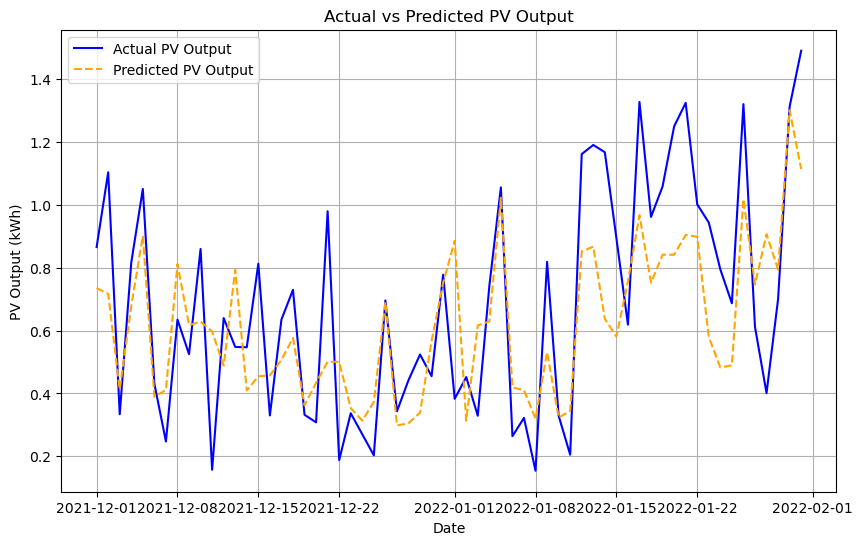

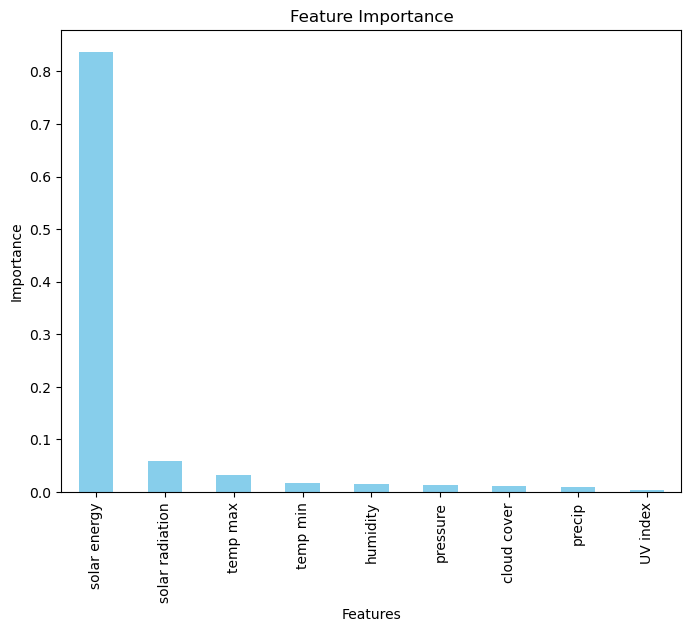

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
data = pd.read_csv('solarPower_50m.csv')

# Convert the 'Unnamed: 0' column to datetime format
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data.set_index('Unnamed: 0', inplace=True)

# Step 2: Split the data into training and testing sets
# Training set: First two years (2019-12-01 to 2021-11-30)
train_data = data.loc['2019-12-01':'2021-11-30']

# Testing set: Final two months (2021-12-01 to 2022-01-31)
test_data = data.loc['2021-12-01':'2022-01-31']

# Separate features (X) and target (y)
X_train = train_data.drop(columns=['PV output'])
y_train = train_data['PV output']
X_test = test_data.drop(columns=['PV output'])
y_test = test_data['PV output']

# Step 3: Handle missing values
# Fill missing values with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 8: Visualize predicted vs. actual PV output
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual PV Output', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted PV Output', color='orange', linestyle='--')
plt.title('Actual vs Predicted PV Output')
plt.xlabel('Date')
plt.ylabel('PV Output (kWh)')
plt.legend()
plt.grid()
plt.show()

# Step 9: Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## Q2 - Extracting data using LLMs

The accompanying PDF file is a data sheet that gives specifications for a number of hardware products available from GivEnergy. Use an open source Large Language Model of your choice to run inference optimally on a single or multi-node cluster to extract the data from this pdf to the best of its ability. Please provide a record of the prompts you use in your interaction with the LLM.



In [20]:
!pip install groq

  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Attempting uninstall: distro
    Found existing installation: distro 1.6.0
    Uninstalling distro-1.6.0:
      Successfully uninstalled distro-1.6.0


In [23]:
!pip install langchain
!pip install openai
!pip install PyPDF2
!pip install faiss-cpu
!pip install tiktoken

  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------------------- -------- 0.8/1.0 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 4.3 MB/s eta 0:00:00
Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
Using cached jsonpointer-3.0.0-py2.py3-none-any.whl (7.6 kB)
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   -- ------------------------------------- 1.0/14.6 MB 5.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/14.6 MB 4.8 MB/s eta 0

In [24]:
!pip install pymupdf4llm

   ---------------------------------------- 0.0/16.0 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.0 MB 5.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.6/16.0 MB 4.7 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/16.0 MB 5.1 MB/s eta 0:00:03
   --------- ------------------------------ 3.9/16.0 MB 5.2 MB/s eta 0:00:03
   ------------- -------------------------- 5.2/16.0 MB 5.3 MB/s eta 0:00:03
   --------------- ------------------------ 6.3/16.0 MB 5.4 MB/s eta 0:00:02
   ------------------- -------------------- 7.6/16.0 MB 5.4 MB/s eta 0:00:02
   --------------------- ------------------ 8.7/16.0 MB 5.3 MB/s eta 0:00:02
   ------------------------ --------------- 9.7/16.0 MB 5.3 MB/s eta 0:00:02
   ---------------------------- ----------- 11.3/16.0 MB 5.4 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/16.0 MB 5.5 MB/s eta 0:00:01
   ---------------------------------- ----- 13.6/16.0 MB 5.5 MB/s eta 0:00:01
   

In [28]:
import fitz  # PyMuPDF
from langchain.text_splitter import CharacterTextSplitter
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
from groq import Groq

# Step 1: Extract text from PDF using PyMuPDF
pdf_path = "Giv - Data Sheet.pdf"
doc = fitz.open(pdf_path)
raw_text = ""
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    raw_text += page.get_text()

# Step 2: Split text into chunks
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=800,
    chunk_overlap=200,
    length_function=len,
)
texts = text_splitter.split_text(raw_text)

# Step 3: Generate embeddings
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedding_model.encode(texts)

# Step 4: Create a FAISS vector store
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings))

class FAISSWrapper:
    def __init__(self, index, texts):
        self.index = index
        self.texts = texts

    def similarity_search(self, query, k=4):
        query_embedding = embedding_model.encode([query])
        distances, indices = self.index.search(query_embedding, k)
        return [self.texts[i] for i in indices[0]]

document_search = FAISSWrapper(index, texts)

# Step 5: Query Groq
client = Groq(api_key="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")

def query_groq(prompt):
    response = client.chat.completions.create(
        model="llama3-70b-8192",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=1000,
        temperature=0.7
    )
    return response.choices[0].message.content

# Perform similarity search
query = "What are the parameters from Model Bat 8.2 from the document?"
docs = document_search.similarity_search(query)

# Prepare the context for Groq
context = "\n".join(docs)
prompt = f"""
Based on the following context, answer the question: "{query}"

Context:
{context}
"""

# Query Groq
response = query_groq(prompt)
print(response)

Based on the provided context, the parameters from Model Bat 8.2 are:

* Capacity: 8.2kWh / 160Ah
* Voltage: 51.2VDC
* Current: 85A
* IP Grade: IP65
* BMS: Robust Multi Point Monitoring BMS Pre Installed
* Life Cycling (100% DOD, 25°C): 10 Years
* Operating Temperature: -30°C - 60°C
* Storage Temperature: -10°C - 55°C
* Warranty BTT: Unlimited Cycles / 10 Years
* Standard: UN 38.3, IEC61000
* Weight: 94 KG
* Operating Voltage Range: 43.2 - 58.5V DC
* Maximum Charging Voltage: 59V DC
* Maximum Charging / Discharging Current: 85A / 85A
* Network Interface: RS485
* Communication Protocols: Modbus
* Advantages: Stackable, BMS Upgradeable, IP65
* Technology: LiFePO4 Cell
